In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
%matplotlib inline

In [2]:
p1 = 'Bike.csv'
df = pd.read_csv(p1)

In [3]:
df.head()

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,8/1/2023 0:00,983,"Euston Road, Euston",8/1/2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,8/1/2023 0:01,3479,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,8/1/2023 0:01,1219,"Lower Marsh, Waterloo",8/1/2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776527 entries, 0 to 776526
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Number                776527 non-null  int64 
 1   Start date            776527 non-null  object
 2   Start station number  776527 non-null  int64 
 3   Start station         776527 non-null  object
 4   End date              776527 non-null  object
 5   End station number    776527 non-null  int64 
 6   End station           776527 non-null  object
 7   Bike number           776527 non-null  int64 
 8   Bike model            776527 non-null  object
 9   Total duration        776527 non-null  object
 10  Total duration (ms)   776527 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 65.2+ MB


##Visualization

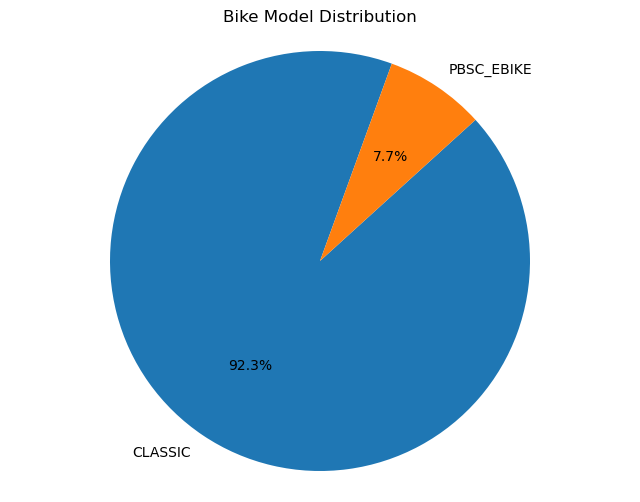

In [5]:
# Bike model distribution
bike_model_counts = df['Bike model'].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(bike_model_counts, labels=bike_model_counts.index, autopct='%1.1f%%', startangle=70)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Bike Model Distribution')

# Show the plot
plt.show()

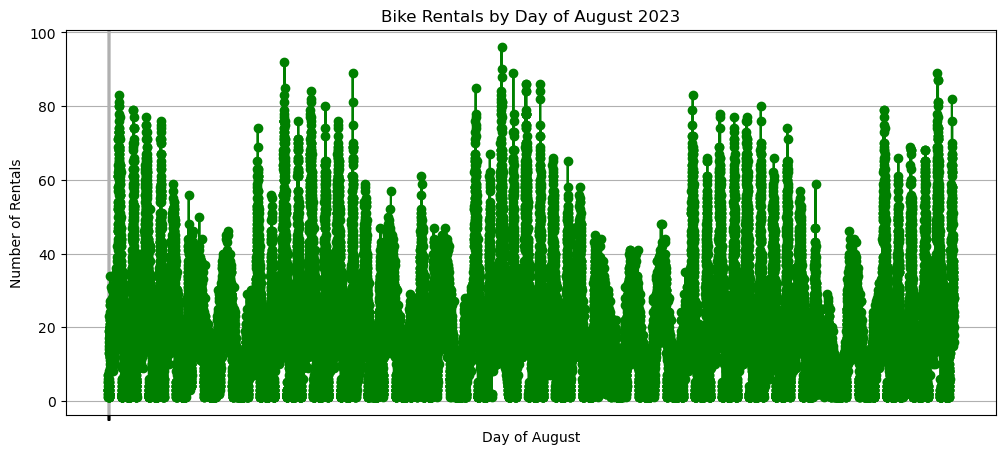

In [6]:
# Analyzing daily trends
daily_counts = df.groupby('Start date').size()
plt.figure(figsize=(12, 5))
daily_counts.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Bike Rentals by Day of August 2023')
plt.xlabel('Day of August')
plt.ylabel('Number of Rentals')
plt.xticks(range(1,32))
plt.grid(True)
plt.show()

#Clustering

#KNN

In [7]:
features = df[['Start station number', 'End station number']]

In [8]:
# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [9]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=5, random_state=42)

In [10]:
df['Cluster'] = kmeans.labels_

In [11]:
df.head()

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),Cluster
0,132825189,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663,0
1,132825190,8/1/2023 0:00,1190,"Kennington Lane Rail Bridge, Vauxhall",8/1/2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128,0
2,132825191,8/1/2023 0:00,983,"Euston Road, Euston",8/1/2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395,0
3,132825192,8/1/2023 0:01,3479,"Old Brompton Road, South Kensington",8/1/2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059,0
4,132825193,8/1/2023 0:01,1219,"Lower Marsh, Waterloo",8/1/2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786,2


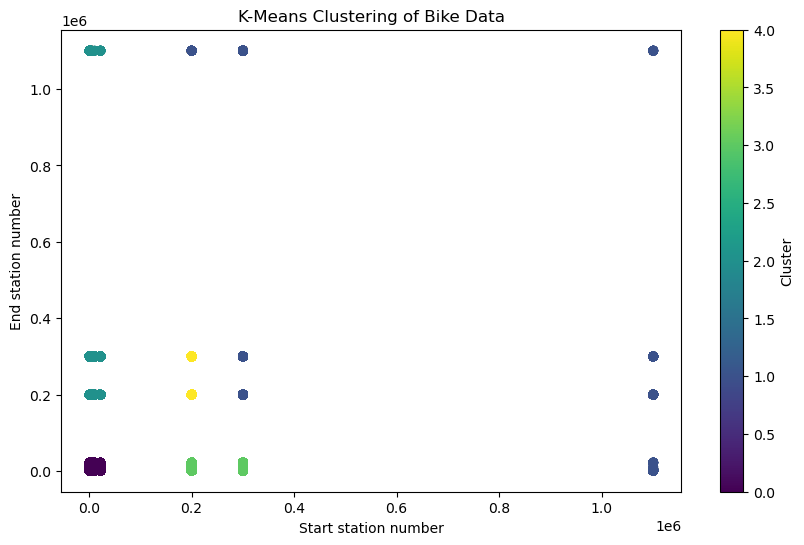

In [12]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Start station number'], df['End station number'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Start station number')
plt.ylabel('End station number')
plt.title('K-Means Clustering of Bike Data')
plt.colorbar(label='Cluster')
plt.show()

##Agglomerative Hierarchical clustering

In [13]:
bike_data_sample = df.sample(n=10000, random_state=42)

# Extract relevant features for clustering
features = bike_data_sample[['Start station number', 'End station number']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [14]:
# Perform Agglomerative Hierarchical clustering
agglo_clustering = AgglomerativeClustering(n_clusters=5) 
bike_data_sample['Agglo_Cluster'] = agglo_clustering.fit_predict(scaled_features)

In [15]:
# Display the first few rows of the dataset with Agglomerative cluster labels
bike_data_sample[['Start station number', 'End station number', 'Agglo_Cluster']].head()

,Start station number,End station number,Agglo_Cluster
459375,3426,300081,3
767039,300249,2587,0
187725,2691,3504,2
222663,200196,1157,0
97213,1206,3471,2


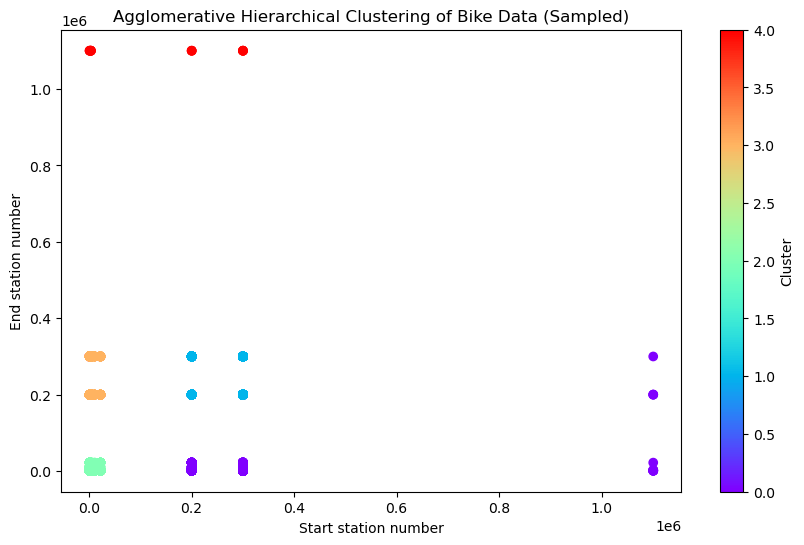

In [16]:
# Visualize the clusters for Agglomerative Clustering
plt.figure(figsize=(10, 6))
plt.scatter(bike_data_sample['Start station number'], bike_data_sample['End station number'], c=bike_data_sample['Agglo_Cluster'], cmap='rainbow')
plt.xlabel('Start station number')
plt.ylabel('End station number')
plt.title('Agglomerative Hierarchical Clustering of Bike Data (Sampled)')
plt.colorbar(label='Cluster')
plt.show()